In [17]:
import pandas as pd
import numpy as np


### 1- Describe the data clearly -- particularly any missing data that might impact your analysis -- and the provenance of your dataset. Who collected the data and why? (10/100 pts)


In [18]:
companies= pd.read_csv("sp500_companies.csv")
index = pd.read_csv("sp500_index.csv")
stocks = pd.read_csv("sp500_stocks.csv")

Exploring companies

In [19]:
companies.head()

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,254.49,3846819807232,1.346610e+11,0.061,Cupertino,CA,United States,164000.0,"Apple Inc. designs, manufactures, and markets ...",0.069209
1,NMS,NVDA,NVIDIA Corporation,NVIDIA Corporation,Technology,Semiconductors,134.70,3298803056640,6.118400e+10,1.224,Santa Clara,CA,United States,29600.0,NVIDIA Corporation provides graphics and compu...,0.059350
2,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software - Infrastructure,436.60,3246068596736,1.365520e+11,0.160,Redmond,WA,United States,228000.0,Microsoft Corporation develops and supports so...,0.058401
3,NMS,AMZN,"Amazon.com, Inc.","Amazon.com, Inc.",Consumer Cyclical,Internet Retail,224.92,2365033807872,1.115830e+11,0.110,Seattle,WA,United States,1551000.0,"Amazon.com, Inc. engages in the retail sale of...",0.042550
4,NMS,GOOGL,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,191.41,2351625142272,1.234700e+11,0.151,Mountain View,CA,United States,181269.0,Alphabet Inc. offers various products and plat...,0.042309


In [20]:
companies.columns

Index(['Exchange', 'Symbol', 'Shortname', 'Longname', 'Sector', 'Industry',
       'Currentprice', 'Marketcap', 'Ebitda', 'Revenuegrowth', 'City', 'State',
       'Country', 'Fulltimeemployees', 'Longbusinesssummary', 'Weight'],
      dtype='object')

In [21]:
companies["Exchange"].value_counts()

Exchange
NYQ    348
NMS    152
BTS      1
NGM      1
Name: count, dtype: int64

In [22]:
#see what companies have same short/long name
same_names = companies[companies["Shortname"] == companies["Longname"]]
list(same_names["Shortname"])[:10]
len(list(same_names["Shortname"])) #378 of same values

#diff short/longname
diff_names = companies[companies["Shortname"] != companies["Longname"]]
diff_names[["Shortname", "Longname"]] #124 companies

,Shortname,Longname
9,Berkshire Hathaway Inc. New,Berkshire Hathaway Inc.
12,JP Morgan Chase & Co.,JPMorgan Chase & Co.
19,Procter & Gamble Company (The),The Procter & Gamble Company
20,"Home Depot, Inc. (The)","The Home Depot, Inc."
26,Coca-Cola Company (The),The Coca-Cola Company
...,...,...
480,Generac Holdlings Inc.,Generac Holdings Inc.
485,"MarketAxess Holdings, Inc.",MarketAxess Holdings Inc.
490,Invesco Ltd,Invesco Ltd.
492,Mosaic Company (The),The Mosaic Company


In [23]:
companies.Sector.value_counts()
#companies.Industry.value_counts()

Sector
Technology                82
Industrials               70
Financial Services        67
Healthcare                62
Consumer Cyclical         55
Consumer Defensive        37
Utilities                 32
Real Estate               31
Communication Services    22
Energy                    22
Basic Materials           22
Name: count, dtype: int64

Companies column descriptions

| Column | Description |
|---------|--------------|
| **Exchange** | Stock exchange the company is traded on. <br>• NYQ — New York Stock Exchange (NYSE) <br>• NMS — NASDAQ Global Select Market <br>• BTS — BATS Exchange (now Cboe BZX) |
| **Symbol** | Company name symbol / stock trade abbreviation. |
| **Shortname** | Short version of the company name. |
| **Longname** | Long version of the company name (≈¾ of companies have the same short and long name, or very similar). |
| **Sector** | Broad category describing the company’s general economic activity (e.g., Technology, Industrials, Financial Services, Healthcare). |
| **Industry** | More specific classification within a sector that describes the company’s main business activity (e.g., Software, Semiconductors, Banks). |
| **Currentprice** | Latest stock value per share. |
| **Marketcap** | Total market value of the company. <br>Formula: *Market Cap = Current Price × Number of Shares*. |
| **Ebitda** | Earnings Before Interest, Taxes, Depreciation, and Amortization — profit from core operations before accounting for financing or tax effects. |
| **Revenuegrowth** | Percentage change in the company’s revenue compared to the previous period. |
| **City** | City where the company is headquartered. |
| **State** | State where the company is headquartered. |
| **Country** | Country where the company is headquartered. |
| **Fulltimeemployees** | Number of full-time employees at the company. |
| **Longbusinesssummary** | Summary of the company’s business activities, products, and services. |
| **Weight** | Weight of the stock in the overall market or index (represents its proportion of total market value). |


Exploring index

In [24]:
index.head()

,Date,S&P500
0,2014-12-22,2078.54
1,2014-12-23,2082.17
2,2014-12-24,2081.88
3,2014-12-26,2088.77
4,2014-12-29,2090.57


In [25]:
index["Date"][0] #'2014-12-23'
len(index)
index["Date"][2516]#2024-12-20


'2024-12-20'

Average of S&P closing index value (weighted average, meaning larger companies have a larger impact)

States these averages from December 2014-2024

Exploring stocks

In [26]:
stocks.head()

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
0,2010-01-04,MMM,44.016731,69.414719,69.774246,69.122070,69.473244,3640265.0
1,2010-01-05,MMM,43.741032,68.979935,69.590302,68.311035,69.230766,3405012.0
2,2010-01-06,MMM,44.361343,69.958191,70.735786,69.824417,70.133781,6301126.0
3,2010-01-07,MMM,44.393166,70.008362,70.033447,68.662209,69.665550,5346240.0
4,2010-01-08,MMM,44.705967,70.501671,70.501671,69.648827,69.974915,4073337.0


In [27]:
stocks["Close"].value_counts()
stocks["Adj Close"].value_counts()

Adj Close
6.848268      77
8.046377      67
35.000000     61
36.000000     61
34.500000     57
              ..
49.930065      1
43.961727      1
43.321053      1
46.608700      1
182.307999     1
Name: count, Length: 1373355, dtype: int64

In [28]:
print(f"last stock collected", stocks["Date"].max())
print(f"first stock in dataset", stocks["Date"].min())

last stock collected 2024-12-20
first stock in dataset 2010-01-04


In [29]:
stocks.columns

Index(['Date', 'Symbol', 'Adj Close', 'Close', 'High', 'Low', 'Open',
       'Volume'],
      dtype='object')


| Column | Description |
|---------|--------------|
| **Date** | The specific trading day for the stock datafrom 2010 to 2024 |
| **Symbol** | The stock’s ticker symbol or trading abbreviation (e.g., AAPL for Apple). |
| **Adj Close** | Adjusted closing price — the closing price modified to account for dividends, stock splits, and other corporate actions. Reflects the stock’s *true value* over time for return calculations. -vconfusing stuff|
| **Close** |  last traded price of the stock during normal trading hours on that date |
| **High** |  highest price the stock reached during the trading day. |
| **Low** |  lowest price the stock reached during the trading day. |
| **Open** |  price at which the stock first traded when the market opened that day. |
| **Volume** | The total number of shares traded during that trading day |


### overview of dataset

Financial Time series, S&P500 Stocks: There are 500 time series here. Model how individual time series adjust over time, either together or separately. (https://www.kaggle.com/datasets/andrewmvd/sp-500-stocks)


Description (From Kaggle): The Standard and Poor's 500 or S&P 500 is the most famous financial benchmark in the world.

This stock market index tracks the performance of 500 large companies listed on stock exchanges in the United States. As of December 31, 2020, more than $5.4 trillion was invested in assets tied to the performance of this index.

Because the index includes multiple classes of stock of some constituent companies—for example, Alphabet's Class A (GOOGL) and Class C (GOOG)—there are actually 505 stocks in the gauge.

# look into missing data + why datacollected


### 2- What phenomenon are you modeling? Provide a brief background on the topic, including definitions and details that are relevant to your analysis. Clearly describe its main features, and support those claims with data where appropriate. (10/100 pts)


### 3-  Describe your non-parametric model (empirical cumulative distribution functions, kernel density function, local constant least squares regression, Markov transition models). How are you fitting your model to the phenomenon to get realistic properties of the data? What challenges did you have to overcome? (15/100 pts)


playing around with random models (looking at s&P)


In [30]:
import matplotlib.pyplot as plt

In [31]:
index = index.rename(columns={"S&P500": "Price"})
index.head(5)

,Date,Price
0,2014-12-22,2078.54
1,2014-12-23,2082.17
2,2014-12-24,2081.88
3,2014-12-26,2088.77
4,2014-12-29,2090.57


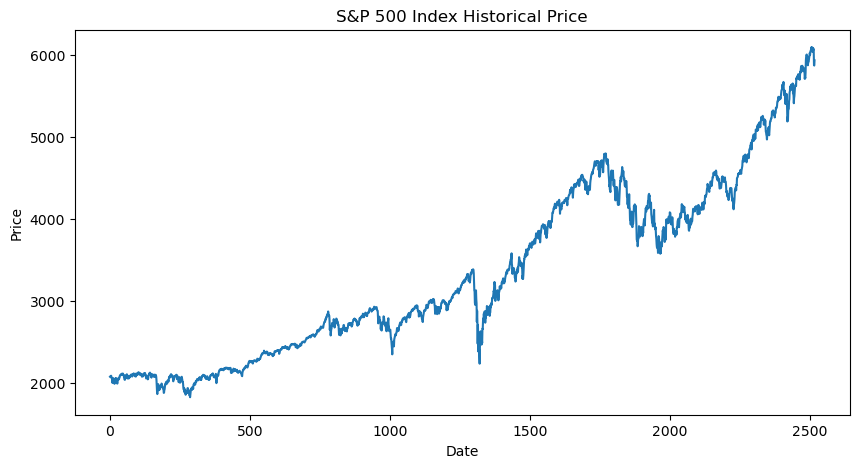

In [32]:
index["Price"].plot(figsize=(10, 5))
plt.title("S&P 500 Index Historical Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

In [33]:
#average line
average = index.rolling(
    window=300,
    center=True,
    min_periods=183,
).mean()


ax = index["Price"].plot(title="S&P 500 Average")
ax = average.plot(ax=ax, label="Moving Average", linewidth=2, figsize=(11, 5), legend=False)
plt.grid( linestyle="--")

DataError: Cannot aggregate non-numeric type: object

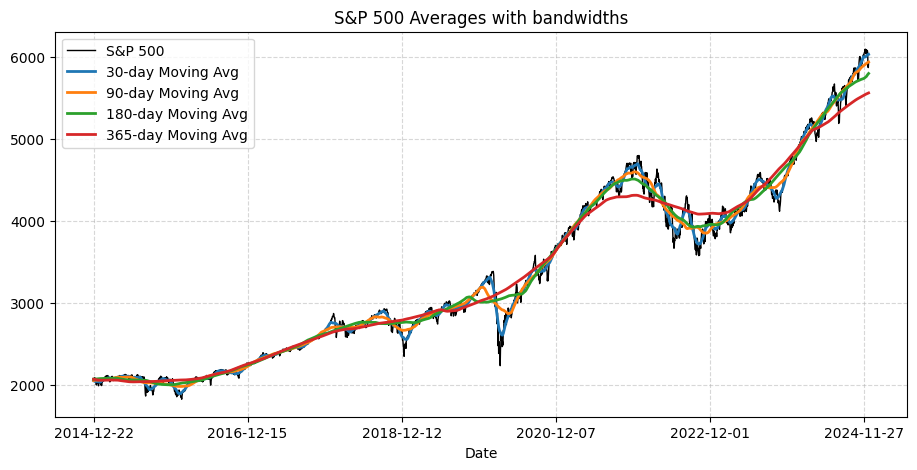

In [ ]:
import matplotlib.pyplot as plt

# testing different bandwidths
windows = [30, 90, 180, 365]
fig, ax = plt.subplots(figsize=(11, 5))
index["Price"].plot(ax=ax, label="S&P 500", color="black", linewidth=1)

for w in windows:
    avg = index["Price"].rolling(window=w, center=True, min_periods=w//2).mean()
    avg.plot(ax=ax, linewidth=2, label=f"{w}-day Moving Avg")

plt.title("S&P 500 Averages with bandwidths")
plt.grid(linestyle="--", alpha=0.5)
plt.legend()
plt.show()

#i like 180 day da best

In [ ]:

# lets make a markov chain!!
#used chat bc i just wanted a start am going to go back l8r n fix her up!!

index["Return"] = index["Price"].pct_change()

# Define states:
# 'up' = return > 0
# 'down' = return < 0
# 'flat' = return ≈ 0 (can use small threshold)
threshold = 0.0001
index["State"] = np.where(index["Return"] > threshold, "up",
                          np.where(index["Return"] < -threshold, "down", "flat"))

# Drop NaN from first row
index = index.dropna(subset=["State"])
    

In [ ]:
# 1. Calculate daily returns
index["Return"] = index["Price"].pct_change()

# 2. Define states
threshold = 0.0001
index["State"] = np.where(index["Return"] > threshold, "up",
                          np.where(index["Return"] < -threshold, "down", "flat"))

# Drop NaN from first row
index = index.dropna(subset=["State"])

# 3. Correctly align current and next states
current_states = index["State"].iloc[:-1].values
next_states = index["State"].iloc[1:].values

# 4. Build transition count table
transition_counts = pd.crosstab(pd.Series(current_states, name="Current"),
                                pd.Series(next_states, name="Next"))

# 5. Convert counts to probabilities
transition_matrix = transition_counts.div(transition_counts.sum(axis=1), axis=0)

print(transition_matrix)


Next         down      flat        up
Current                              
down     0.432810  0.011344  0.555846
flat     0.382353  0.000000  0.617647
up       0.476796  0.014970  0.508234


In [ ]:
np.random.seed(42)

# Start in a given state
current_state = "up"
simulated_states = [current_state]

for _ in range(10):  # simulate 10 days
    next_state = np.random.choice(transition_matrix.columns,
                                  p=transition_matrix.loc[current_state].values)
    simulated_states.append(next_state)
    current_state = next_state

print(simulated_states)


['up', 'down', 'up', 'up', 'up', 'down', 'down', 'down', 'up', 'up', 'up']


#######################################################################

In [ ]:
# Data before 2020 for training
train = stocks[stocks['Date'] < '2020-01-04']

# Data after 2020 for testing
test = stocks[stocks['Date'] >= '2020-01-04']


In [ ]:

# Convert date to datetime
stocks['Date'] = pd.to_datetime(stocks['Date'])

# Sort values
stocks = stocks.sort_values(['Symbol','Date'])

# Compute daily percent change per stock
stocks['pct_change'] = stocks.groupby('Symbol')['Adj Close'].pct_change()

# Drop NaN (first row of each stock)
stocks = stocks.dropna(subset=['pct_change'])

# Create 'State' column: Bull if pct_change > 0 else Bear
stocks['State'] = stocks['pct_change'].apply(lambda x: 'Bull' if x > 0 else 'Bear')


C:\Users\Jillian Howe\AppData\Local\Temp\ipykernel_19800\679560528.py:12: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  stocks['pct_change'] = stocks.groupby('Symbol')['Adj Close'].pct_change()


In [ ]:
sp_comp = pd.read_csv('sp500_companies.csv')
sp_comp.head()


,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,254.49,3846819807232,1.346610e+11,0.061,Cupertino,CA,United States,164000.0,"Apple Inc. designs, manufactures, and markets ...",0.069209
1,NMS,NVDA,NVIDIA Corporation,NVIDIA Corporation,Technology,Semiconductors,134.70,3298803056640,6.118400e+10,1.224,Santa Clara,CA,United States,29600.0,NVIDIA Corporation provides graphics and compu...,0.059350
2,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software - Infrastructure,436.60,3246068596736,1.365520e+11,0.160,Redmond,WA,United States,228000.0,Microsoft Corporation develops and supports so...,0.058401
3,NMS,AMZN,"Amazon.com, Inc.","Amazon.com, Inc.",Consumer Cyclical,Internet Retail,224.92,2365033807872,1.115830e+11,0.110,Seattle,WA,United States,1551000.0,"Amazon.com, Inc. engages in the retail sale of...",0.042550
4,NMS,GOOGL,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,191.41,2351625142272,1.234700e+11,0.151,Mountain View,CA,United States,181269.0,Alphabet Inc. offers various products and plat...,0.042309


In [ ]:
# Assume sp_comp has columns: Symbol, Sector, Marketcap
stocks = stocks.merge(sp_comp[['Symbol','Sector','Marketcap']], on='Symbol', how='left')


In [ ]:
transition_matrices = {}
tickers = stocks['Symbol'].unique()

for t in tickers:
    ticker_state = stocks[stocks['Symbol']==t].sort_values('Date')['State'].values
    transition_matrices[t] = pd.crosstab(
        pd.Series(ticker_state[:-1], name='From'),
        pd.Series(ticker_state[1:], name='To'),
        normalize='index'
    )


In [ ]:
sector_groups = stocks[['Symbol','Sector']].drop_duplicates()
sectors = sector_groups['Sector'].unique()
sector_transitions = {}

for sector in sectors:
    symbol_sector = sector_groups[sector_groups['Sector']==sector]['Symbol']
    matrices, weights = [], []

    for t in symbol_sector:
        if t in transition_matrices:
            matrices.append(transition_matrices[t])
            weight = stocks.loc[stocks['Symbol']==t, 'Marketcap'].iloc[0]
            weights.append(weight)

    if matrices:
        matrices = [m.values if isinstance(m, pd.DataFrame) else m for m in matrices]
        weighted_sum = sum(m*w for m,w in zip(matrices, weights))
        avg_matrix = weighted_sum / sum(weights)
        sector_transitions[sector] = avg_matrix


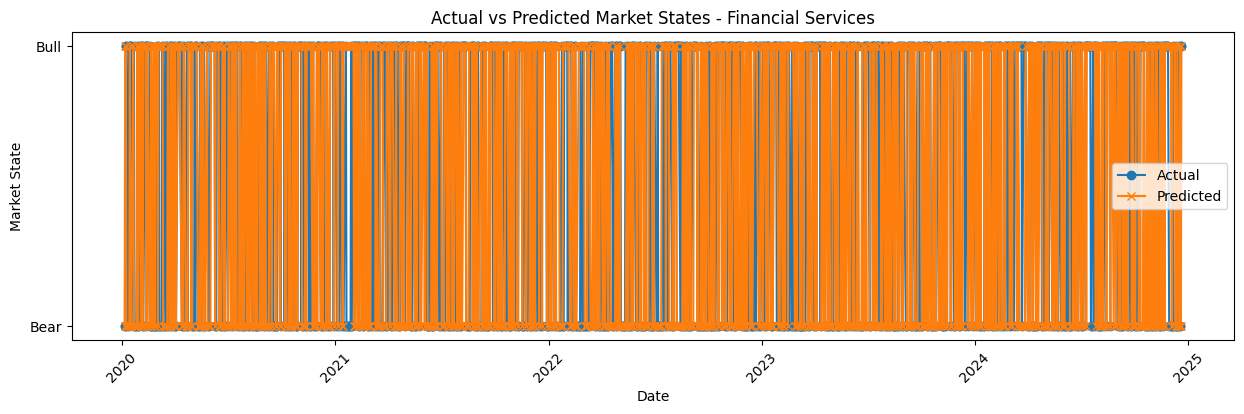

In [ ]:
sector_name = 'Financial Services'
matrix = sector_transitions[sector_name]

def predict_next_state(prev_state, matrix):
    return np.random.choice(['Bear','Bull'], p=matrix[0] if prev_state=='Bear' else matrix[1])

# Split data
train = stocks[stocks['Date']<'2020-01-04']
test = stocks[stocks['Date']>='2020-01-04']

# Get test sector data
sector_test = test[test['Sector']==sector_name].sort_values('Date')
sector_test = sector_test.groupby('Date')['State'].agg(lambda x: x.mode()[0]).reset_index()

# Forecast
predicted = []
prev_state = train[train['Sector']==sector_name].sort_values('Date')['State'].iloc[-1]
for _ in range(len(sector_test)):
    next_state = predict_next_state(prev_state, matrix)
    predicted.append(next_state)
    prev_state = next_state

sector_test['Predicted'] = predicted

# Plot
plt.figure(figsize=(15,4))
plt.plot(sector_test['Date'], sector_test['State'], label='Actual', marker='o')
plt.plot(sector_test['Date'], sector_test['Predicted'], label='Predicted', marker='x')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Market State')
plt.title(f'Actual vs Predicted Market States - {sector_name}')
plt.legend()
plt.show()


### 4- Either use your model to create new sequences (if the model is more generative) or bootstrap a quantity of interest (if the model is more inferential). (15/100 pts)


### 5- Critically evaluate your work in part 4. Do your sequences have the properties of the training data, and if not, why not? Are your estimates credible and reliable, or is there substantial uncertainty in your results? (15/100 pts)


### 5-  Write a conclusion that explains the limitations of your analysis and potential for future work on this topic. (10/100 pts)

### Simple Predictive Model for Market Price using Logistic Regression


# cursor shit that isnt halpful

In [34]:
# Simple model: Use logistic regression to predict price direction (up/down)
# Then use that to estimate price change

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [35]:
# Prepare data - ensure stocks is sorted and has Date as datetime
stocks_pred = stocks.copy()
if 'Date' not in stocks_pred.columns or stocks_pred['Date'].dtype == 'object':
    stocks_pred['Date'] = pd.to_datetime(stocks_pred['Date'])
stocks_pred = stocks_pred.sort_values(['Symbol', 'Date']).reset_index(drop=True)

# Create simple features
stocks_pred['prev_close'] = stocks_pred.groupby('Symbol')['Close'].shift(1)
stocks_pred['ma_5'] = stocks_pred.groupby('Symbol')['Close'].transform(lambda x: x.rolling(5, min_periods=1).mean())
stocks_pred['ma_10'] = stocks_pred.groupby('Symbol')['Close'].transform(lambda x: x.rolling(10, min_periods=1).mean())

# Create target: 1 if price goes up, 0 if price goes down
stocks_pred['price_direction'] = (stocks_pred.groupby('Symbol')['Close'].shift(-1) > stocks_pred['Close']).astype(int)

# Drop rows with NaN
stocks_pred = stocks_pred.dropna(subset=['prev_close', 'ma_5', 'ma_10', 'price_direction', 'Close', 'Open', 'High', 'Low'])

print(f"Data shape: {stocks_pred.shape}")
print(f"Price goes up: {(stocks_pred['price_direction']==1).sum()}")
print(f"Price goes down: {(stocks_pred['price_direction']==0).sum()}")


Data shape: (1790559, 12)
Price goes up: 930981
Price goes down: 859578


In [36]:
# Simple features for logistic regression
feature_cols = ['prev_close', 'ma_5', 'ma_10', 'Open', 'High', 'Low', 'Volume']

# Split into train and test (temporal split)
train_mask = stocks_pred['Date'] < '2020-01-01'
test_mask = stocks_pred['Date'] >= '2020-01-01'

X_train = stocks_pred[train_mask][feature_cols]
y_train = stocks_pred[train_mask]['price_direction']
X_test = stocks_pred[test_mask][feature_cols]
y_test = stocks_pred[test_mask]['price_direction']

print(f"Training set: {len(X_train):,} samples")
print(f"Test set: {len(X_test):,} samples")


Training set: 1,170,102 samples
Test set: 620,457 samples


In [37]:
# Train logistic regression model
log_model = LogisticRegression(random_state=42, max_iter=1000)
log_model.fit(X_train, y_train)

# Make predictions
y_train_pred = log_model.predict(X_train)
y_test_pred = log_model.predict(X_test)

# Calculate accuracy
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print("=" * 50)
print("LOGISTIC REGRESSION MODEL - PRICE DIRECTION PREDICTION")
print("=" * 50)
print(f"\nTraining Accuracy: {train_acc:.4f} ({train_acc*100:.2f}%)")
print(f"Test Accuracy: {test_acc:.4f} ({test_acc*100:.2f}%)")

print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred, target_names=['Down', 'Up']))


LOGISTIC REGRESSION MODEL - PRICE DIRECTION PREDICTION

Training Accuracy: 0.5221 (52.21%)
Test Accuracy: 0.5158 (51.58%)

Classification Report (Test Set):
              precision    recall  f1-score   support

        Down       0.00      0.00      0.00    300435
          Up       0.52      1.00      0.68    320022

    accuracy                           0.52    620457
   macro avg       0.26      0.50      0.34    620457
weighted avg       0.27      0.52      0.35    620457



In [38]:
# Now use the direction prediction to estimate price
# Simple approach: if predicted up, use average of (Open + High), if down, use average of (Open + Low)

test_data = stocks_pred[test_mask].copy()
test_data['predicted_direction'] = y_test_pred
test_data['actual_next_close'] = test_data.groupby('Symbol')['Close'].shift(-1)

# Simple price prediction based on direction
test_data['predicted_close'] = np.where(
    test_data['predicted_direction'] == 1,
    (test_data['Open'] + test_data['High']) / 2,  # If going up, use avg of Open and High
    (test_data['Open'] + test_data['Low']) / 2    # If going down, use avg of Open and Low
)

# Alternative: use previous close with expected change
# Calculate average % change when price goes up vs down
avg_up_change = test_data[test_data['price_direction']==1].groupby('Symbol').apply(
    lambda x: (x['Close'].shift(-1) / x['Close'] - 1).mean()
).mean()

avg_down_change = test_data[test_data['price_direction']==0].groupby('Symbol').apply(
    lambda x: (x['Close'].shift(-1) / x['Close'] - 1).mean()
).mean()

print(f"\nAverage % change when price goes up: {avg_up_change*100:.2f}%")
print(f"Average % change when price goes down: {avg_down_change*100:.2f}%")

# Better prediction: use previous close * (1 + expected change)
test_data['predicted_close_v2'] = np.where(
    test_data['predicted_direction'] == 1,
    test_data['Close'] * (1 + avg_up_change),
    test_data['Close'] * (1 + avg_down_change)
)

# Calculate errors
test_data_clean = test_data.dropna(subset=['actual_next_close', 'predicted_close', 'predicted_close_v2'])

mae_simple = np.mean(np.abs(test_data_clean['actual_next_close'] - test_data_clean['predicted_close']))
mae_v2 = np.mean(np.abs(test_data_clean['actual_next_close'] - test_data_clean['predicted_close_v2']))

print(f"\nPrice Prediction Errors:")
print(f"Simple method MAE: ${mae_simple:.2f}")
print(f"Method with expected change MAE: ${mae_v2:.2f}")



Average % change when price goes up: 0.11%
Average % change when price goes down: 0.12%

Price Prediction Errors:
Simple method MAE: $2.89
Method with expected change MAE: $2.34


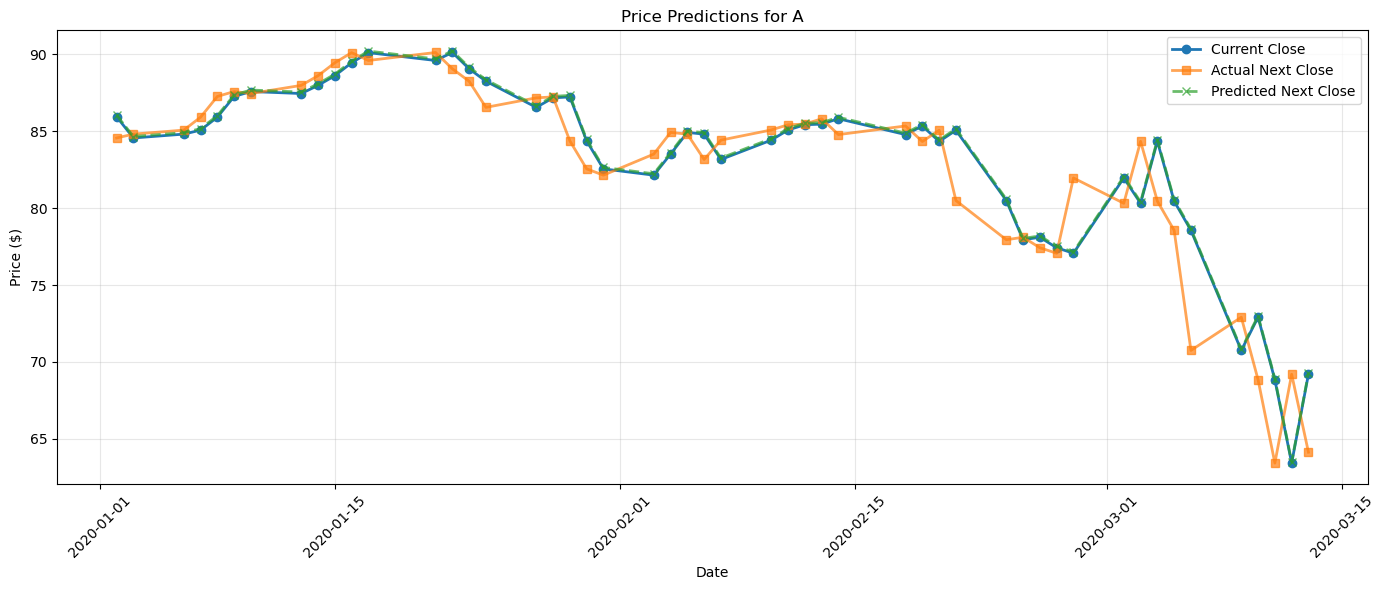

In [39]:
# Visualize predictions for a sample stock
sample_symbol = test_data_clean['Symbol'].iloc[0]
sample_stock = test_data_clean[test_data_clean['Symbol'] == sample_symbol].sort_values('Date').head(50)

plt.figure(figsize=(14, 6))
plt.plot(sample_stock['Date'], sample_stock['Close'], 'o-', label='Current Close', linewidth=2)
plt.plot(sample_stock['Date'], sample_stock['actual_next_close'], 's-', label='Actual Next Close', linewidth=2, alpha=0.7)
plt.plot(sample_stock['Date'], sample_stock['predicted_close_v2'], 'x--', label='Predicted Next Close', linewidth=2, alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.title(f'Price Predictions for {sample_symbol}')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [40]:
# Show feature coefficients (importance)
coef_df = pd.DataFrame({
    'Feature': feature_cols,
    'Coefficient': log_model.coef_[0]
}).sort_values('Coefficient', key=abs, ascending=False)

print("\nFeature Coefficients (Logistic Regression):")
print(coef_df.to_string(index=False))



Feature Coefficients (Logistic Regression):
   Feature  Coefficient
      High 6.669478e-05
     ma_10 6.655501e-05
      ma_5 6.631062e-05
prev_close 6.627771e-05
      Open 6.624180e-05
       Low 6.545119e-05
    Volume 2.973772e-10


### Alternative: Markov Chain Model for Price Prediction


In [41]:
# Markov Chain approach: Use price change states to predict next price
# Build on existing Markov chain work but extend to predict actual prices

# Create price change states (similar to what you did before)
stocks_markov = stocks.copy()
stocks_markov['Date'] = pd.to_datetime(stocks_markov['Date'])
stocks_markov = stocks_markov.sort_values(['Symbol', 'Date']).reset_index(drop=True)

# Calculate returns
stocks_markov['return'] = stocks_markov.groupby('Symbol')['Close'].pct_change()

# Define states based on return magnitude
# Small change: -0.5% to 0.5%
# Medium up: 0.5% to 2%
# Large up: > 2%
# Medium down: -2% to -0.5%
# Large down: < -2%

def get_price_state(ret):
    if pd.isna(ret):
        return None
    elif ret < -0.02:
        return 'large_down'
    elif ret < -0.005:
        return 'medium_down'
    elif ret < 0.005:
        return 'small'
    elif ret < 0.02:
        return 'medium_up'
    else:
        return 'large_up'

stocks_markov['state'] = stocks_markov['return'].apply(get_price_state)
stocks_markov = stocks_markov.dropna(subset=['state', 'return'])

print("State distribution:")
print(stocks_markov['state'].value_counts())


State distribution:
state
small          557266
medium_up      475101
medium_down    415874
large_up       177292
large_down     165026
Name: count, dtype: int64


In [42]:
# Build transition matrix for a sample stock (or aggregate across stocks)
sample_symbol = stocks_markov['Symbol'].iloc[0]
stock_data = stocks_markov[stocks_markov['Symbol'] == sample_symbol].sort_values('Date')

# Create transition matrix
current_states = stock_data['state'].iloc[:-1].values
next_states = stock_data['state'].iloc[1:].values

transition_counts = pd.crosstab(
    pd.Series(current_states, name='Current'),
    pd.Series(next_states, name='Next')
)
transition_matrix = transition_counts.div(transition_counts.sum(axis=1), axis=0).fillna(0)

print(f"Transition Matrix for {sample_symbol}:")
print(transition_matrix)


Transition Matrix for A:
Next         large_down  large_up  medium_down  medium_up     small
Current                                                            
large_down     0.177285  0.196676     0.193906   0.232687  0.199446
large_up       0.143229  0.148438     0.268229   0.239583  0.200521
medium_down    0.083238  0.092360     0.218928   0.319270  0.286203
medium_up      0.073755  0.083333     0.249042   0.271073  0.322797
small          0.083636  0.080000     0.228182   0.278182  0.330000


In [43]:
# Calculate average return for each state (to predict price change)
state_returns = stock_data.groupby('state')['return'].mean()
print(f"\nAverage returns by state for {sample_symbol}:")
print(state_returns)

# Predict next price using Markov chain
def predict_price_markov(current_price, current_state, transition_matrix, state_returns):
    """Predict next price using Markov chain"""
    # Get probabilities for next state
    if current_state in transition_matrix.index:
        next_state_probs = transition_matrix.loc[current_state]
        # Expected return = weighted average of state returns
        expected_return = sum(next_state_probs * state_returns[next_state_probs.index])
        predicted_price = current_price * (1 + expected_return)
        return predicted_price, next_state_probs.idxmax()  # Most likely next state
    else:
        return current_price, current_state

# Test on sample data
test_markov = stock_data[stock_data['Date'] >= '2020-01-01'].head(20).copy()
test_markov['predicted_price'] = np.nan
test_markov['predicted_state'] = ''

prev_state = stock_data[stock_data['Date'] < '2020-01-01']['state'].iloc[-1]

for idx, row in test_markov.iterrows():
    pred_price, pred_state = predict_price_markov(
        row['Close'], prev_state, transition_matrix, state_returns
    )
    test_markov.loc[idx, 'predicted_price'] = pred_price
    test_markov.loc[idx, 'predicted_state'] = pred_state
    prev_state = row['state']  # Use actual state for next prediction

test_markov['actual_next'] = test_markov['Close'].shift(-1)
test_markov_clean = test_markov.dropna(subset=['actual_next', 'predicted_price'])

mae_markov = np.mean(np.abs(test_markov_clean['actual_next'] - test_markov_clean['predicted_price']))
print(f"\nMarkov Chain Prediction MAE: ${mae_markov:.2f}")



Average returns by state for A:
state
large_down    -0.033388
large_up       0.031656
medium_down   -0.010794
medium_up      0.011224
small          0.000035
Name: return, dtype: float64

Markov Chain Prediction MAE: $0.80


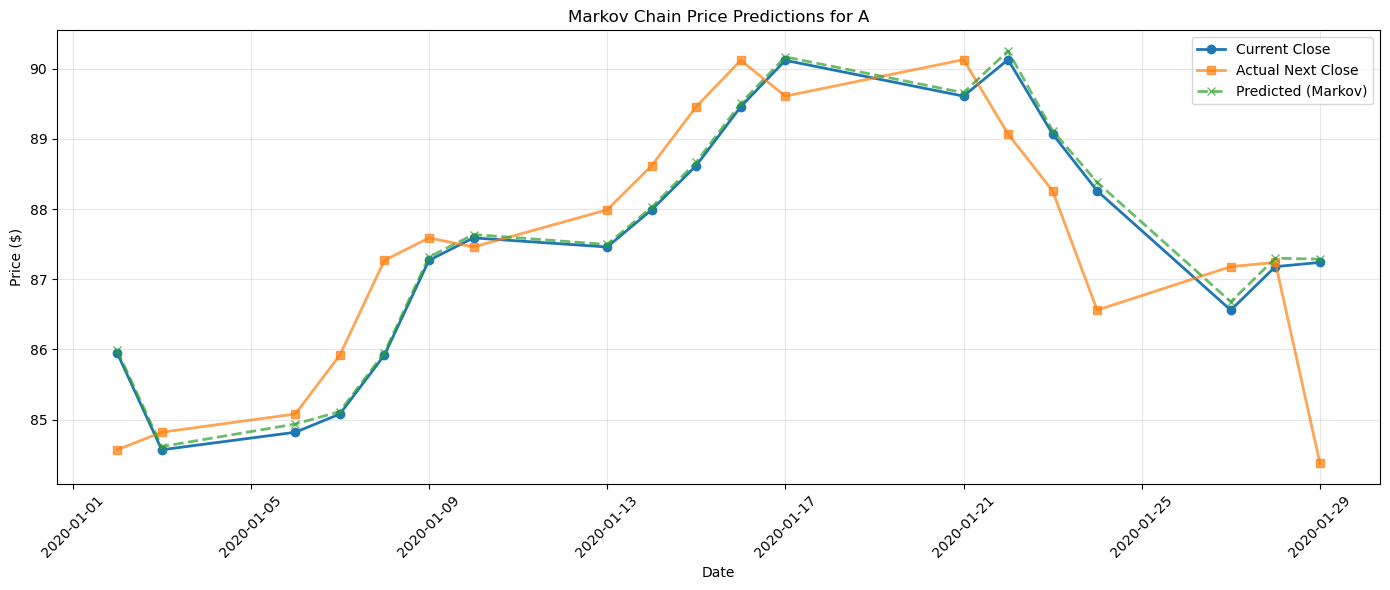

In [44]:
# Visualize Markov chain predictions
plt.figure(figsize=(14, 6))
plt.plot(test_markov_clean['Date'], test_markov_clean['Close'], 'o-', label='Current Close', linewidth=2)
plt.plot(test_markov_clean['Date'], test_markov_clean['actual_next'], 's-', label='Actual Next Close', linewidth=2, alpha=0.7)
plt.plot(test_markov_clean['Date'], test_markov_clean['predicted_price'], 'x--', label='Predicted (Markov)', linewidth=2, alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.title(f'Markov Chain Price Predictions for {sample_symbol}')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
